## Part 1

1.What are the three key elements to keep in mind when you design an explanatory visualization?

2.In the video I talk about (1) overview first, (2) zoom and filter, (3) details on demand.

    -Go online and find a visualization that follows these principles (don't use one from the video).

    -Explain how your video achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.

3.Explain in your own words: How is explanatory data analysis different from exploratory data analysis?

1. 
Ans:
Start with the question "What is the result you want to communicate?" <br>
Allow exploration (let users investigate...hence D3) <br>
Know your readers (design for an audience)

3. <br>
Ans: <br>
Exploratory data analysis (EDA) is the process of analyzing data to summarize its main characteristics, identify patterns, and test hypotheses. The purpose of EDA is to gain insights into the data, find interesting trends, and generate hypotheses that can be further tested. EDA is usually done at the beginning of a data analysis project and is typically more open-ended and exploratory in nature. <br>
Explanatory data analysis (EDA), on the other hand, is focused on answering specific questions or hypotheses based on the insights and patterns identified during EDA. The purpose of EDA is to communicate the insights gained from the data analysis to others in a clear and understandable way. EDA is usually done after EDA and involves creating visualizations, statistical models, and other forms of data presentation to support the conclusions drawn from the data.<br>
In summary, while EDA is more open-ended and exploratory in nature, EDA is focused on answering specific questions and communicating the insights gained from the data analysis.

## Part 2

In [21]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Rect, FactorRange, Legend
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
from bokeh.palettes import Category20 as Palette

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# Create column 'Year' from 'Date'
df['Year'] = [date.split('/')[-1] for date in df.loc[:,'Date']]

# Filter data for the years between 2010 and 2017
df = df[(df.Year >= '2010') & (df.Year <= '2017')]

# Keep only the focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

df_focus = df.loc[df.Category.isin(focuscrimes)].copy()

In [4]:
# Convert the "time" column to a datetime format
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M")

# Extract the hour and year from the "time" column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group the data by the "hour" and "Category" columns
grouped = df.groupby(["Hour", "Category"])

# Count the number of rows in each group
counts = grouped.size().reset_index(name="counts")

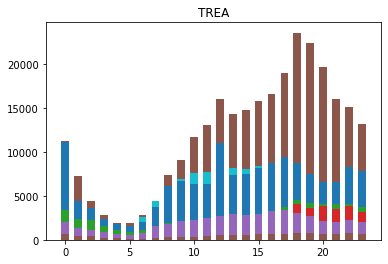

In [6]:
# Create a bar plot for each category
for category in counts["Category"].unique():
    category_data = counts[counts["Category"] == category]
    hour = category_data["Hour"]
    count = category_data["counts"]
    
    plt.bar(hour, count,width=0.6)
    plt.title("{}".format(category))
    #plt.show()

In [7]:
# Create column 'Hour' from 'Time'
df_focus['Hour'] = [int(time.split(':')[0]) for time in df_focus.loc[:,'Time']]

# Get the count for each category and hour
cat_hour = df_focus.groupby(['Category', 'Hour'])['PdId'].count().reset_index()

# Pivot the table to have one column per crime type
df_pivot = cat_hour.pivot(index='Hour', columns='Category', values='PdId')

# Normalize
df_norm = df_pivot.apply(lambda x: x/x.sum(), axis=0)

df_norm.head()

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Hour,,,,,,,,,,,,,,
0,0.055468,0.040191,0.052282,0.121869,0.035064,0.080276,0.039479,0.129656,0.056201,0.044247,0.027969,0.054945,0.035913,0.054413
1,0.049745,0.027653,0.038354,0.114539,0.020654,0.077235,0.025431,0.095748,0.060538,0.033786,0.021191,0.038576,0.024113,0.039486
2,0.044837,0.031432,0.032569,0.098656,0.016746,0.070140,0.015607,0.060436,0.061111,0.029686,0.025391,0.035994,0.018234,0.032891
3,0.023267,0.032765,0.018642,0.047954,0.012489,0.027367,0.009971,0.036367,0.037957,0.023325,0.021382,0.026022,0.011841,0.022737
4,0.014025,0.029379,0.014999,0.017410,0.009279,0.014393,0.006543,0.019501,0.023943,0.020356,0.015559,0.017797,0.010011,0.016662


In [26]:
source = ColumnDataSource(df_norm)

In [27]:
p = figure(width=1000, x_range=FactorRange(factors=df_norm.index.astype(str)))


bar ={} # to store vbars
items = [] ### for the custom legend // you need to figure out where to add it
colors = Palette[len(focuscrimes)]

### here we will do a for loop:
for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='Hour',  top=i, source= source,color = colors[indx], 
                    ### we will create a vbar for each focuscrime
                    muted_alpha=0.5, muted = True) 
    items.append((i, [bar[i]])) ### figure where to add it
    
legend = Legend(items=items) ## figure where to add it
p.add_layout(legend, "left") ## figure where to add it
### if you read the guide, it will make sense
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot